In [2]:
# Install PySpark
!pip install pyspark

# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("BostonHousingAnalysis") \
    .getOrCreate()

# Upload the dataset
from google.colab import files
uploaded = files.upload()

#1 Read the CSV file into a Spark DataFrame
df = spark.read.csv(list(uploaded.keys())[0], header=True, inferSchema=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=20a238b6477dba6c0a7228938b78dfbbaae0d6529ff05007b9feda40df8d87c3
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


Saving BostonHousing.csv to BostonHousing.csv


In [3]:
#2 Show the first 5 elements of the dataset
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [4]:
#3 Count number of observations
print("Number of observations:", df.count())

Number of observations: 506


In [5]:
#4 Show the schema of the dataset
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [6]:
#5 Drop the column "b"
df = df.drop("b")

In [7]:
#6 Round all numerical columns into two decimal places
numerical_cols = [col_name for col_name, col_type in df.dtypes if col_type != "string"]
df = df.select([round(col(col_name), 2).alias(col_name) if col_name in numerical_cols else col(col_name) for col_name in df.columns])

In [8]:
#7 Create a new column "Age10" with 10% increasing of 'age' column
df = df.withColumn("Age10", col("age") * 1.10)

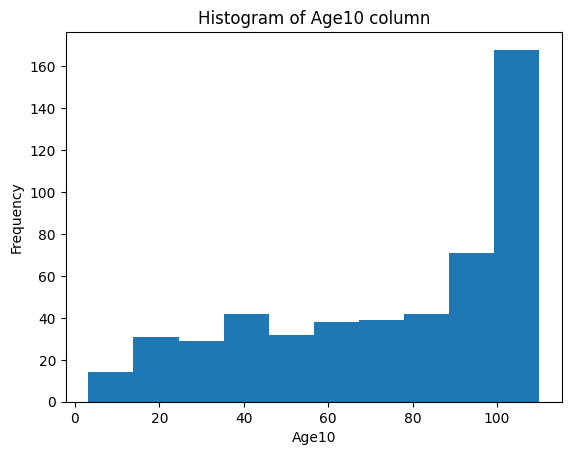

In [9]:
#8 Plot histogram of the "Age10" column
age10_histogram = df.select("Age10").rdd.flatMap(lambda x: x).histogram(10)
plt.hist(age10_histogram[0][:-1], bins=age10_histogram[0], weights=age10_histogram[1])
plt.xlabel("Age10")
plt.ylabel("Frequency")
plt.title("Histogram of Age10 column")
plt.show()

In [10]:
#9a Provide summary statistics of all columns
df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

In [11]:
#9b Convert Spark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

In [12]:
#10 Show the last 5 rows of the Pandas DataFrame
print(pandas_df.tail())

     crim   zn  indus  chas   nox    rm   age   dis  rad  tax  ptratio  lstat  \
501  0.06  0.0  11.93     0  0.57  6.59  69.1  2.48    1  273     21.0   9.67   
502  0.05  0.0  11.93     0  0.57  6.12  76.7  2.29    1  273     21.0   9.08   
503  0.06  0.0  11.93     0  0.57  6.98  91.0  2.17    1  273     21.0   5.64   
504  0.11  0.0  11.93     0  0.57  6.79  89.3  2.39    1  273     21.0   6.48   
505  0.05  0.0  11.93     0  0.57  6.03  80.8  2.51    1  273     21.0   7.88   

     medv   Age10  
501  22.4   76.01  
502  20.6   84.37  
503  23.9  100.10  
504  22.0   98.23  
505  11.9   88.88  


     crim   zn  indus  chas   nox    rm   age   dis  rad  tax  ptratio  lstat  \
501  0.06  0.0  11.93     0  0.57  6.59  69.1  2.48    1  273     21.0   9.67   
502  0.05  0.0  11.93     0  0.57  6.12  76.7  2.29    1  273     21.0   9.08   
503  0.06  0.0  11.93     0  0.57  6.98  91.0  2.17    1  273     21.0   5.64   
504  0.11  0.0  11.93     0  0.57  6.79  89.3  2.39    1  273     21.0   6.48   
505  0.05  0.0  11.93     0  0.57  6.03  80.8  2.51    1  273     21.0   7.88   

     medv   Age10  
501  22.4   76.01  
502  20.6   84.37  
503  23.9  100.10  
504  22.0   98.23  
505  11.9   88.88  


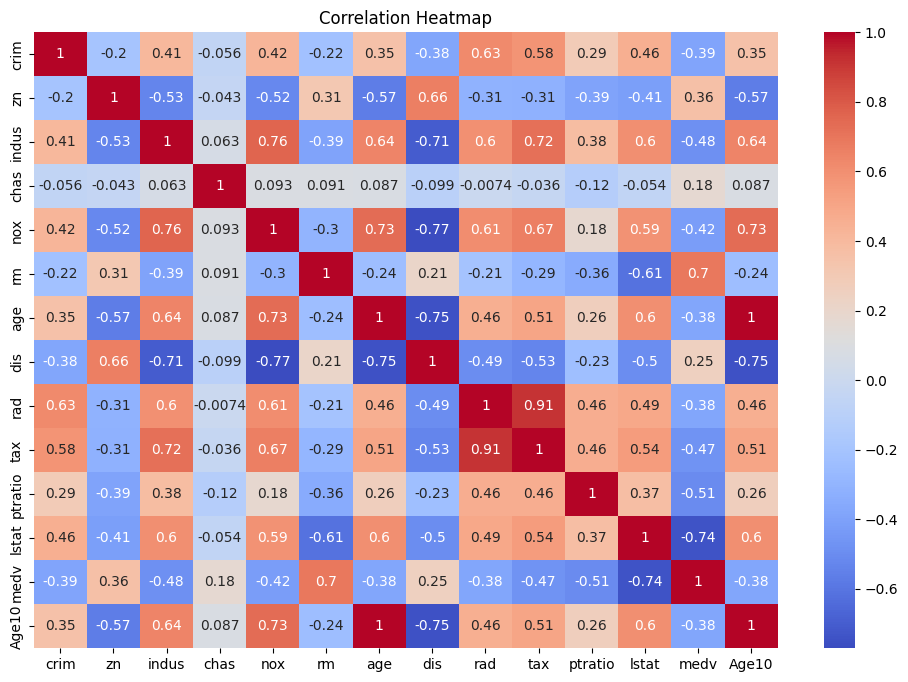

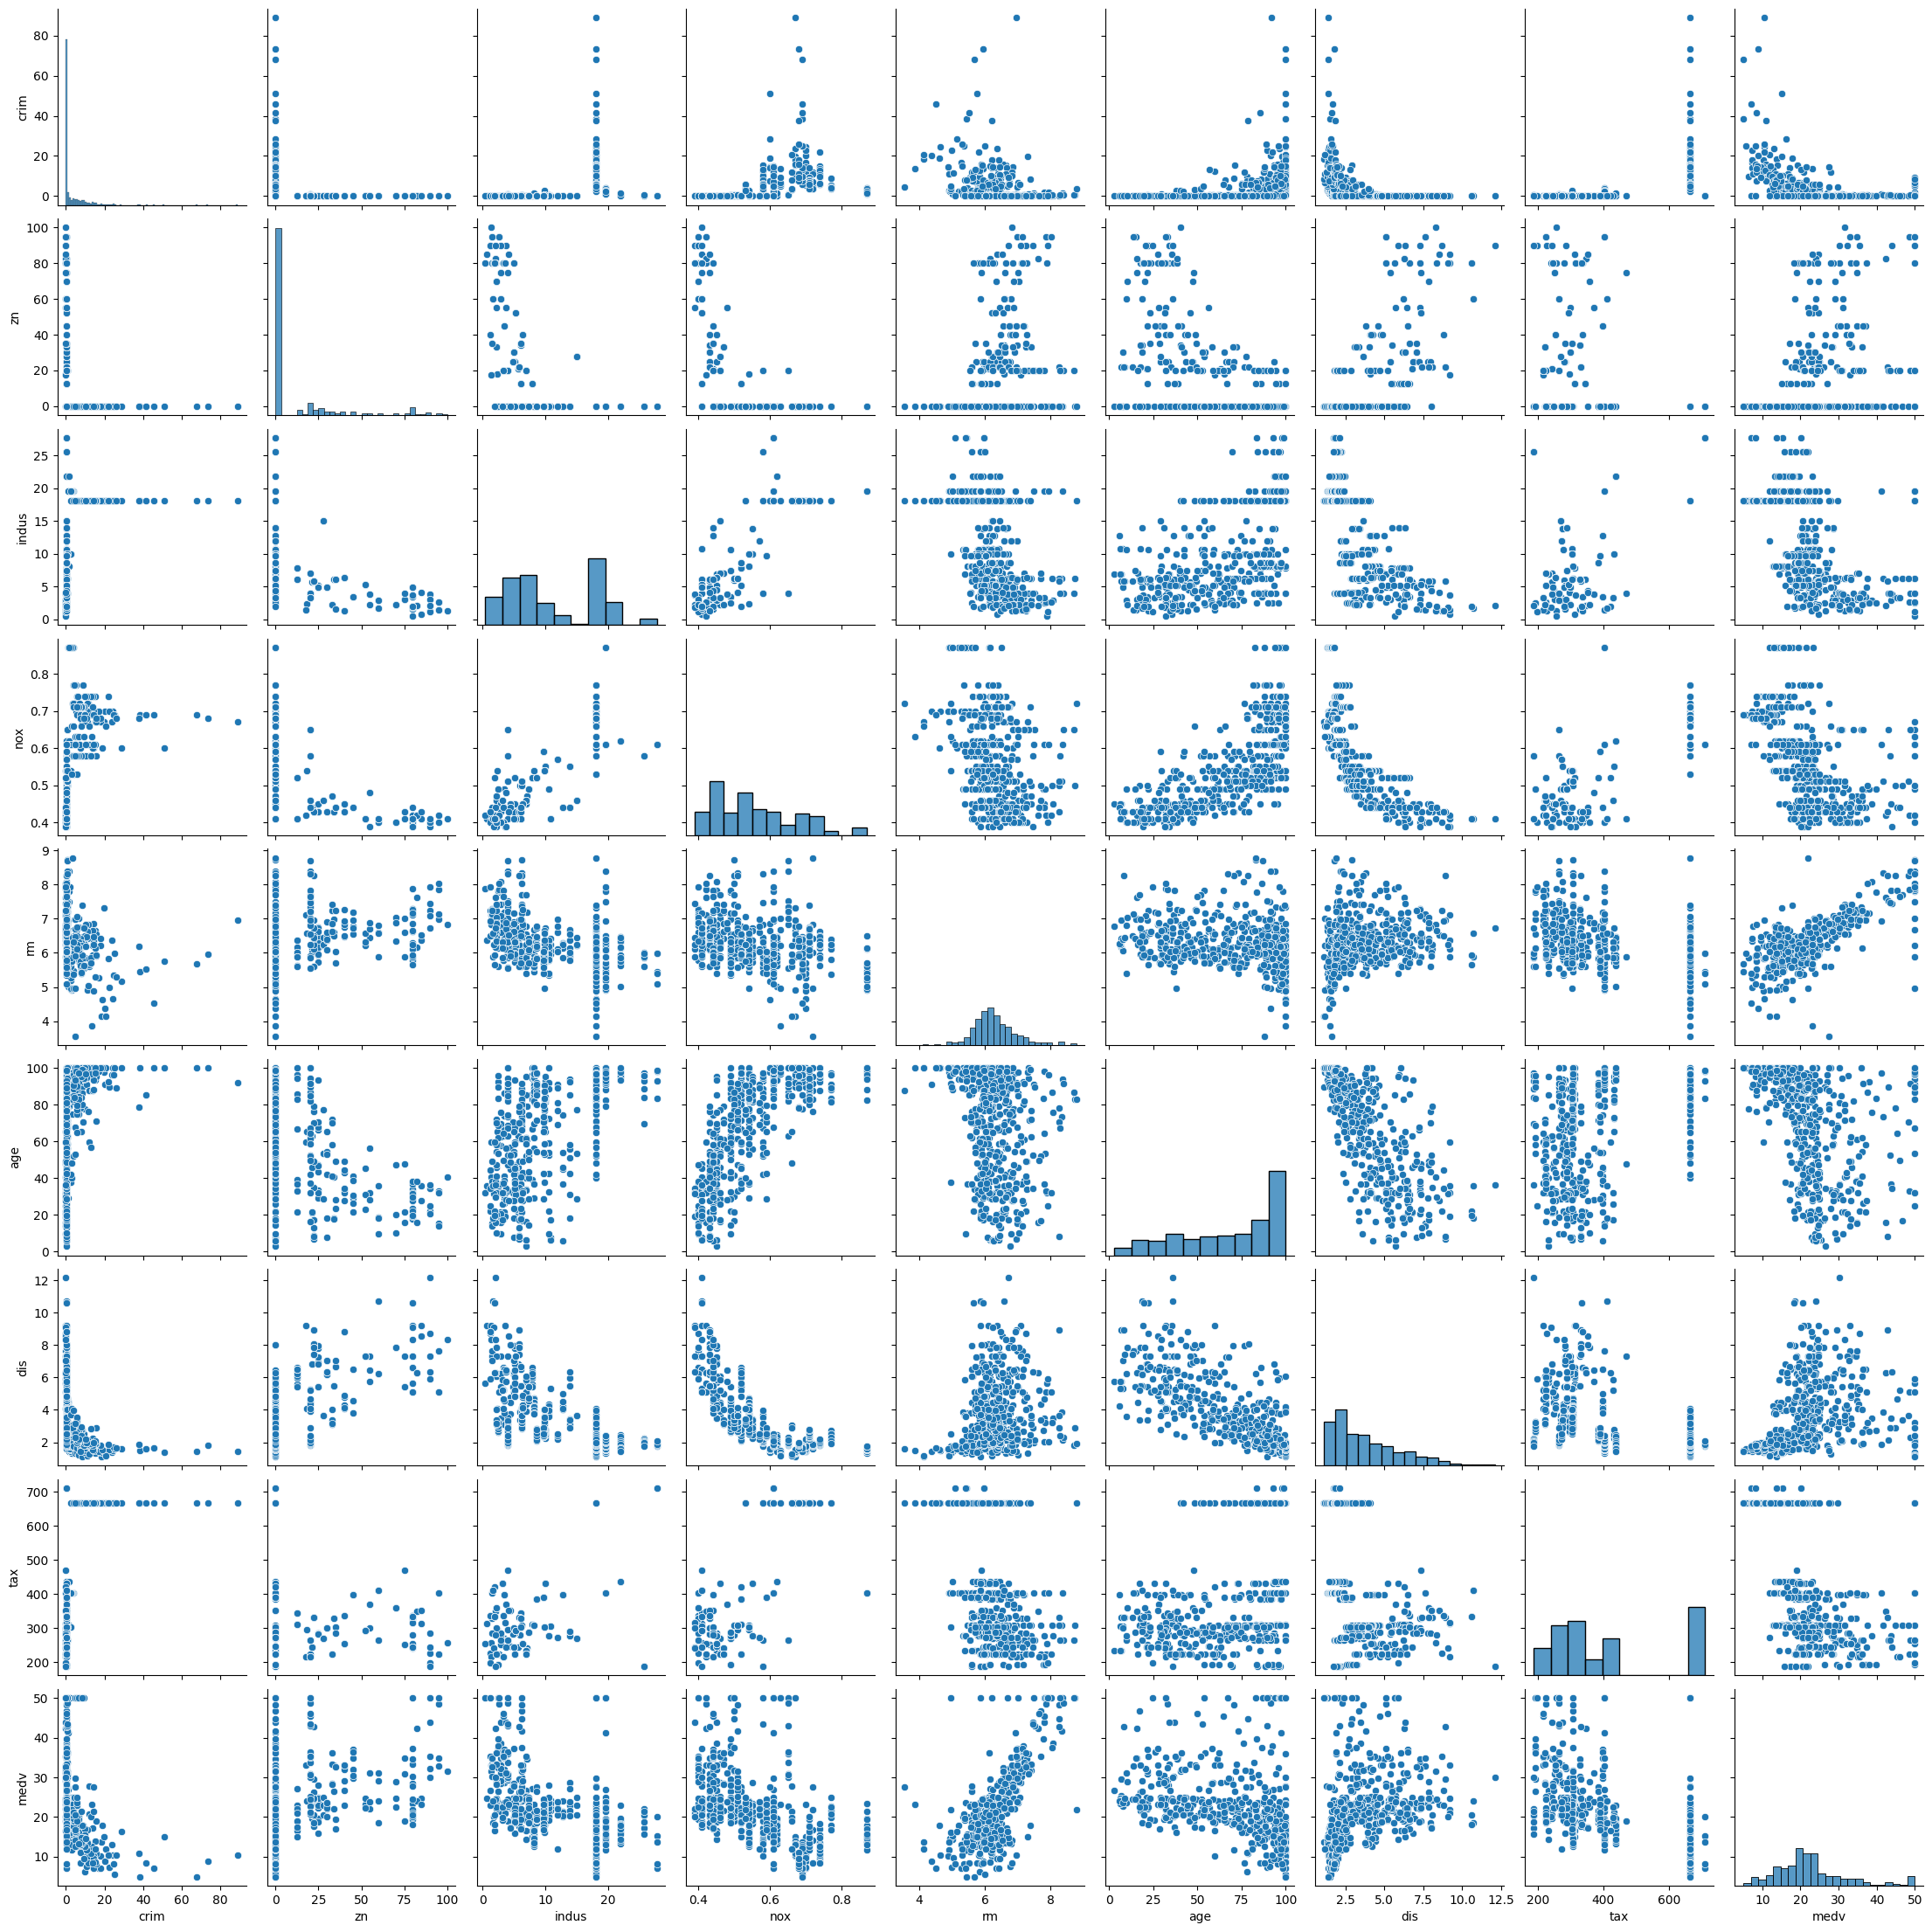

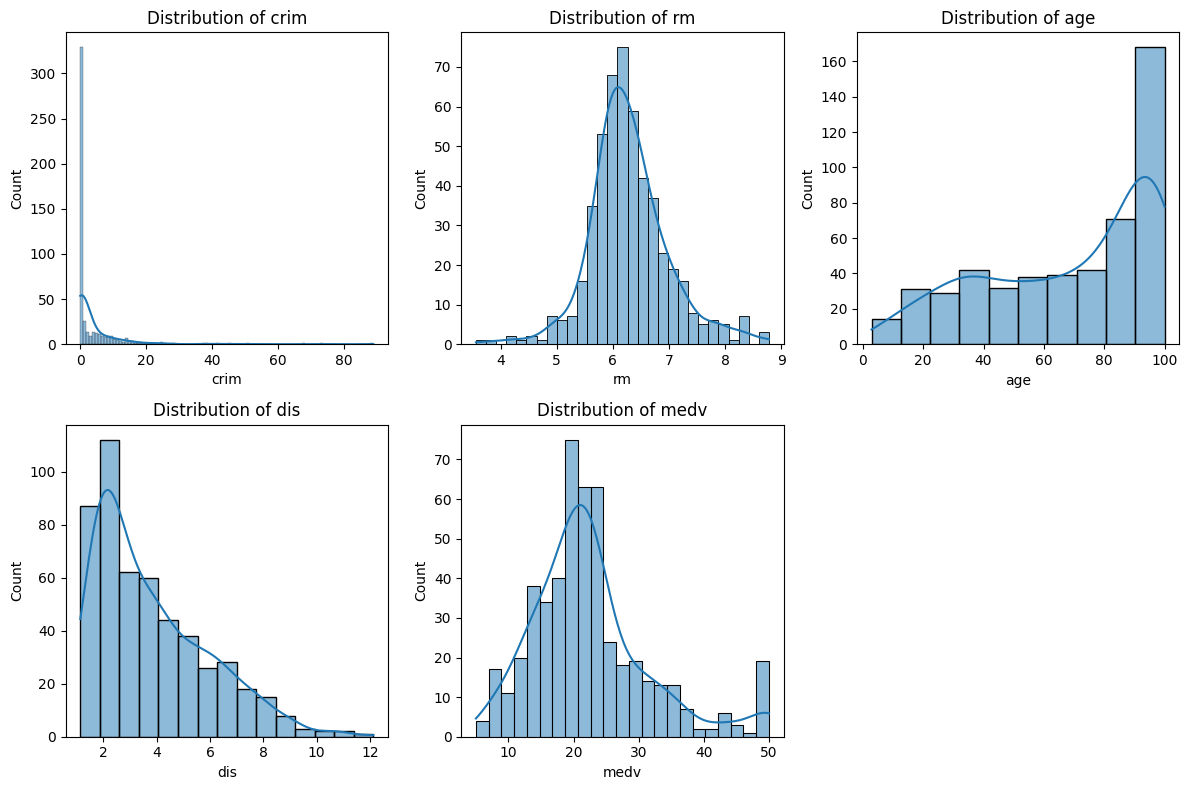

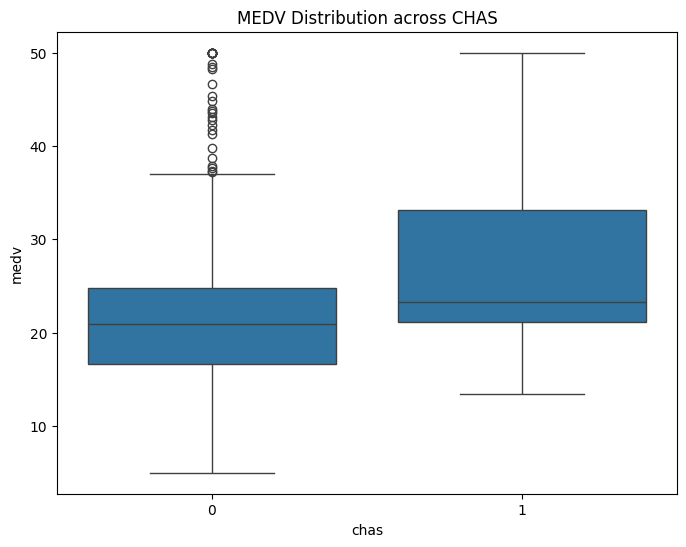

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the Spark DataFrame is converted to a Pandas DataFrame
pandas_df = df.toPandas()

# Show the last 5 rows of the Pandas DataFrame
print(pandas_df.tail())

# 11 Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = pandas_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 12 Pair Plot
sns.pairplot(pandas_df[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'medv']])
plt.show()

# 13 Distribution Plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(['crim', 'rm', 'age', 'dis', 'medv'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(pandas_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# 14 Box Plots
plt.figure(figsize=(8, 6))
sns.boxplot(x='chas', y='medv', data=pandas_df)
plt.title('MEDV Distribution across CHAS')
plt.show()
